In [2]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

# Sample dataset
sms_data = [
    "Win a free trip to Paris! Click here!",  # Spam
    "Don't forget our meeting tomorrow.",    # Non-Spam
    "You have won a $1000 gift card!",       # Spam
    "Hi, are we still on for dinner tonight?" # Non-Spam
]

# Labels: 1 for Spam, 0 for Non-Spam
labels = [1, 0, 1, 0]

# Step 1: Define the custom features to look for
custom_features = ["Win", "Won", "Click", "Free", "Gift"]

# Step 2: Transform SMS data into binary feature vectors
def extract_features(messages, features):
    binary_vectors = []
    for msg in messages:
        # Create a binary vector for each message
        binary_vector = [1 if feature.lower() in msg.lower() else 0 for feature in features]
        binary_vectors.append(binary_vector)
    return np.array(binary_vectors)

# Extract binary feature vectors for the dataset
X = extract_features(sms_data, custom_features)

# Step 3: Train the model on the entire dataset
model = BernoulliNB()
model.fit(X, labels)

# Step 4: Predict for the entire dataset
predictions = model.predict(X)

# Step 5: Output predictions
print("Predictions for SMS messages:")
for sms, prediction in zip(sms_data, predictions):
    label = "Spam" if prediction == 1 else "Non-Spam"
    print(f"SMS: {sms} --> Predicted as: {label}")


Predictions for SMS messages:
SMS: Win a free trip to Paris! Click here! --> Predicted as: Spam
SMS: Don't forget our meeting tomorrow. --> Predicted as: Non-Spam
SMS: You have won a $1000 gift card! --> Predicted as: Spam
SMS: Hi, are we still on for dinner tonight? --> Predicted as: Non-Spam


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Sample SMS dataset
sms_data = [
    "Win a free trip to Paris! Click here!",  # Spam
    "Don't forget our meeting tomorrow.",    # Non-Spam
    "You have won a $1000 gift card!",       # Spam
    "Hi, are we still on for dinner tonight?", # Non-Spam
    "Exclusive offer just for you. Act now!", # Spam
    "Can you call me when you get a chance?", # Non-Spam
]

# Labels: 1 for Spam, 0 for Non-Spam
labels = [1, 0, 1, 0, 1, 0]

# Step 1: Vectorize the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sms_data)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=42)

# Step 3: Train and evaluate Multinomial Naive Bayes
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)
y_pred_mnb = multinomial_nb.predict(X_test)

print("Multinomial Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mnb) * 100:.2f}%")
print(classification_report(y_test, y_pred_mnb))

# Step 4: Train and evaluate Bernoulli Naive Bayes
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)
y_pred_bnb = bernoulli_nb.predict(X_test)

print("\nBernoulli Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bnb) * 100:.2f}%")
print(classification_report(y_test, y_pred_bnb))


Multinomial Naive Bayes:
Accuracy: 0.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0


Bernoulli Naive Bayes:
Accuracy: 33.33%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



c:\Users\DeepanShanmugam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DeepanShanmugam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DeepanShanmugam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [4]:
#understanding the vectorization

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Sample SMS dataset
sms_data = [
    "Win a free trip to Paris! Click here!",  # SMS 1
    "Don't forget our meeting tomorrow.",    # SMS 2
    "You have won a $1000 gift card!",       # SMS 3
    "Hi, are we still on for dinner tonight?" # SMS 4
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Transform the text data into a Document-Term Matrix
X = vectorizer.fit_transform(sms_data)

# Get feature names (unique words)
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a DataFrame for better visualization
df = pd.DataFrame(X.toarray(), columns=feature_names)

# Display the DataFrame
print(df)


   1000  are  card  click  dinner  don  for  forget  free  gift  ...  paris  \
0     0    0     0      1       0    0    0       0     1     0  ...      1   
1     0    0     0      0       0    1    0       1     0     0  ...      0   
2     1    0     1      0       0    0    0       0     0     1  ...      0   
3     0    1     0      0       1    0    1       0     0     0  ...      0   

   still  to  tomorrow  tonight  trip  we  win  won  you  
0      0   1         0        0     1   0    1    0    0  
1      0   0         1        0     0   0    0    0    0  
2      0   0         0        0     0   0    0    1    1  
3      1   0         0        1     0   1    0    0    0  

[4 rows x 26 columns]


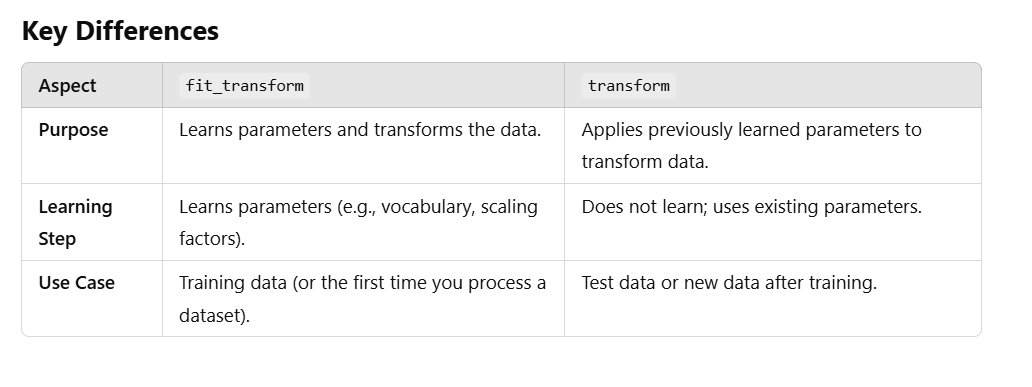

In [5]:
###Both transform and fit_transform

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Training data (used to fit and transform)
training_data = [
    "Win a free trip to Paris",
    "Click here to claim your prize"
]

# Test data (used only for transform)
test_data = [
    "Claim your free prize",
    "Win now and claim your reward"
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Step 1: Fit and transform the training data
X_train = vectorizer.fit_transform(training_data)
print("Vocabulary:", vectorizer.get_feature_names_out())

# Convert the training data matrix to a DataFrame for better readability
df_train = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTraining Data Transformed:")
print(df_train)

# Step 2: Transform the test data using the same vocabulary
X_test = vectorizer.transform(test_data)

# Convert the test data matrix to a DataFrame for better readability
df_test = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTest Data Transformed:")
print(df_test)


Vocabulary: ['claim' 'click' 'free' 'here' 'paris' 'prize' 'to' 'trip' 'win' 'your']

Training Data Transformed:
   claim  click  free  here  paris  prize  to  trip  win  your
0      0      0     1     0      1      0   1     1    1     0
1      1      1     0     1      0      1   1     0    0     1

Test Data Transformed:
   claim  click  free  here  paris  prize  to  trip  win  your
0      1      0     1     0      0      1   0     0    0     1
1      1      0     0     0      0      0   0     0    1     1


Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



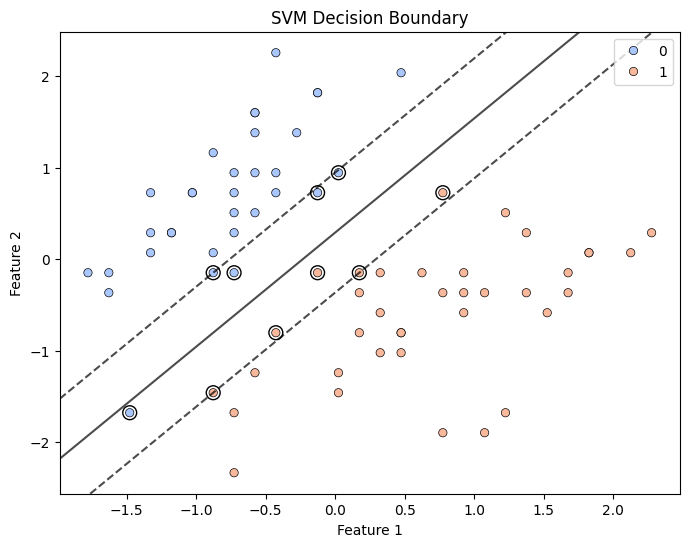

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (for visualization purposes)
y = iris.target

# Select only two classes (binary classification)
X = X[y != 2]
y = y[y != 2]

# Step 2: Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train an SVM
svm = SVC(kernel="linear", C=1.0)  # Linear kernel
svm.fit(X_train, y_train)

# Step 5: Evaluate the SVM
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 6: Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of data
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    
    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create a grid
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot the decision boundary and margins
    ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.7, linestyles=["--", "-", "--"], colors="k")
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    
    plt.title("SVM Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X_train, y_train, svm)


SVM with Linear Kernel:
Training Accuracy: 83.57%
Testing Accuracy: 83.33%

Classification Report (Linear Kernel - Test Data):
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60


SVM with RBF Kernel:
Training Accuracy: 92.86%
Testing Accuracy: 96.67%

Classification Report (RBF Kernel - Test Data):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.96      0.96      0.96        28

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



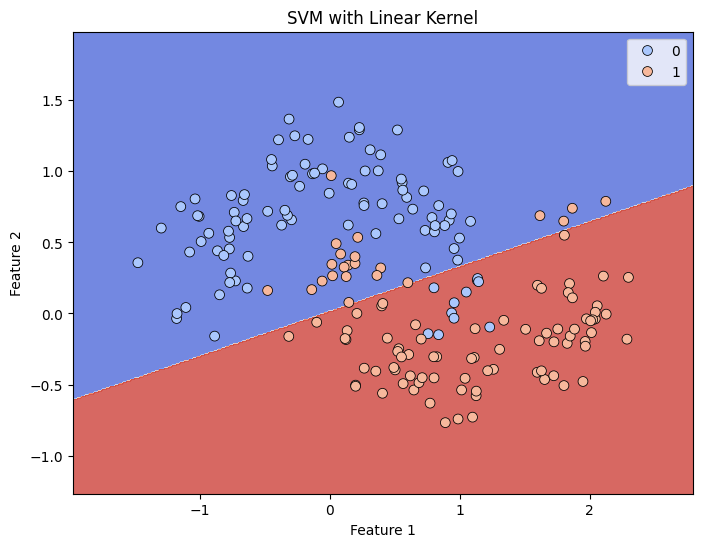

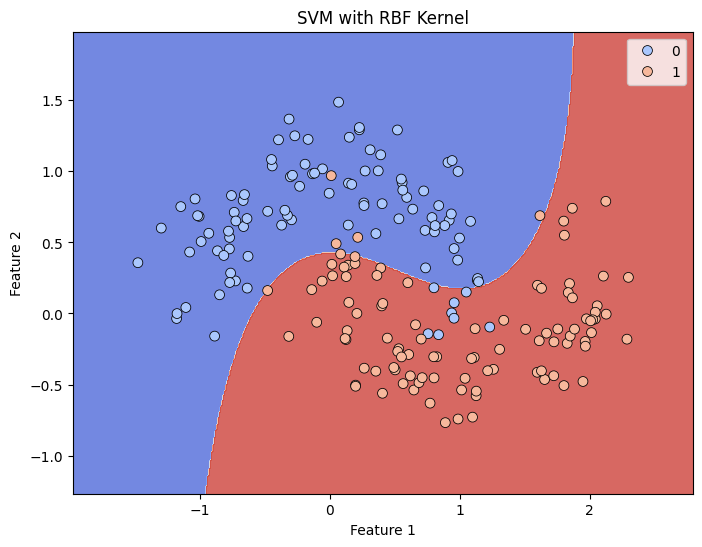

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create a synthetic dataset (non-linear)
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train SVM with Linear Kernel
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)

# Step 4: Train SVM with RBF Kernel
rbf_svm = SVC(kernel='rbf', C=1.0, gamma=0.5)
rbf_svm.fit(X_train, y_train)

# Step 5: Evaluate and Predict for Linear Kernel
y_pred_train_linear = linear_svm.predict(X_train)
y_pred_test_linear = linear_svm.predict(X_test)

linear_train_accuracy = accuracy_score(y_train, y_pred_train_linear)
linear_test_accuracy = accuracy_score(y_test, y_pred_test_linear)

print("SVM with Linear Kernel:")
print(f"Training Accuracy: {linear_train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {linear_test_accuracy * 100:.2f}%")
print("\nClassification Report (Linear Kernel - Test Data):")
print(classification_report(y_test, y_pred_test_linear))

# Step 6: Evaluate and Predict for RBF Kernel
y_pred_train_rbf = rbf_svm.predict(X_train)
y_pred_test_rbf = rbf_svm.predict(X_test)

rbf_train_accuracy = accuracy_score(y_train, y_pred_train_rbf)
rbf_test_accuracy = accuracy_score(y_test, y_pred_test_rbf)

print("\nSVM with RBF Kernel:")
print(f"Training Accuracy: {rbf_train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {rbf_test_accuracy * 100:.2f}%")
print("\nClassification Report (RBF Kernel - Test Data):")
print(classification_report(y_test, y_pred_test_rbf))

# Step 7: Function to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(8, 6))
    
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    
    # Scatter plot of data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Step 8: Visualize decision boundaries
plot_decision_boundary(X, y, linear_svm, "SVM with Linear Kernel")
plot_decision_boundary(X, y, rbf_svm, "SVM with RBF Kernel")
